Importing Neccessary Libraries

In [48]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from collections import OrderedDict
from itertools import product
from parse_football_stats import parse_football_stats
from top_n_outcomes_from_folder import top_n_outcomes_from_folder

### Testing the parsing function
Parameters:
filename (`str`): The path to the `HTML file` containing football match statistics.

Returns:
`pandas.DataFrame`: A DataFrame containing parsed football match statistics, including team names, scores, odds, probabilities, and sorted by probabilities in descending order.

In [49]:
stats = parse_football_stats('Matches 060224/wolverhampton_brentford.html')
stats

,Game,Team,Score,Odds,Probability
0,Wolverhampton vs Brentford,Draw,1-1,13/2,0.153846
1,Wolverhampton vs Brentford,Wolverhampton,1-0,9/1,0.111111
2,Wolverhampton vs Brentford,Wolverhampton,2-1,9/1,0.111111
3,Wolverhampton vs Brentford,Wolverhampton,2-0,11/1,0.090909
4,Wolverhampton vs Brentford,Draw,0-0,11/1,0.090909
5,Wolverhampton vs Brentford,Brentford,2-1,12/1,0.083333
6,Wolverhampton vs Brentford,Brentford,1-0,12/1,0.083333
7,Wolverhampton vs Brentford,Draw,2-2,14/1,0.071429
8,Wolverhampton vs Brentford,Wolverhampton,3-1,18/1,0.055556
9,Wolverhampton vs Brentford,Brentford,2-0,18/1,0.055556


### Testing the Top N Outcomes function
Retrieve the `top n_outcomes` outcomes from `HTML files` in the specified directory.

Parameters:
`directory` (`str`): The path to the directory containing `HTML files` with football match statistics.
`n_outcomes` (`int`, optional): The number of top outcomes to retrieve. Defaults to 2.

Returns:
`pandas.DataFrame`: A DataFrame containing the top `n_outcomes` outcomes, including teams, scores, odds, and probabilities.

In [50]:
top_n_outcomes_from_folder('Matches 060224', 2)

,Game,Team,Score,Odds,Probability
0,Fulham vs Bournemouth,Draw,1-1,13/2,0.153846
1,Fulham vs Bournemouth,Fulham,2-1,9/1,0.111111
2,Wolverhampton vs Brentford,Draw,1-1,13/2,0.153846
3,Wolverhampton vs Brentford,Wolverhampton,1-0,9/1,0.111111
4,Tottenham vs Brighton,Draw,1-1,17/2,0.117647
5,Tottenham vs Brighton,Tottenham,2-1,9/1,0.111111
6,Nottm Forest vs Newcastle,Draw,1-1,7/1,0.142857
7,Nottm Forest vs Newcastle,Newcastle,2-1,17/2,0.117647
8,Luton vs Sheff Utd,Draw,1-1,7/1,0.142857
9,Luton vs Sheff Utd,Luton,1-0,8/1,0.125000


### Creating a GridSearch to find the optimum bets

First lets define a search grid

In [51]:
num_outcomes = 5
df = top_n_outcomes_from_folder('Matches 060224', num_outcomes)

temp_dict = OrderedDict()
for game in df['Game'].unique():
    game_probs = []
    for i in range(len(df)):
        if df['Game'][i] == game:
            game_probs.append(df['Probability'].iloc[i:i+num_outcomes -1].tolist())
    temp_dict[game] = game_probs

param_grid = OrderedDict()
for key, value in temp_dict.items():
    param_grid[key] = [v[0] for v in value]
    
#param_grid

Now lets use an exhaustive search to find the top performing combinations

In [52]:
n = 100 # Number of top results to show
number_of_bets_correct_to_win = 6 # Set to see probabilities for different prizes

def total_probability(probabilities_list):
    total = 1
    probabilities_list = sorted(probabilities_list, reverse=True)[:number_of_bets_correct_to_win]
    for probabilities in probabilities_list:
        total *= probabilities
    return total

top_results = [] 

for params in product(*param_grid.values()):
    current_total_probability = total_probability(params)
    if len(top_results) < n or current_total_probability > min(top_results)[0]:
        top_results.append((current_total_probability, params))
        top_results.sort(reverse=True)
        top_results = top_results[:n]

print(f"Top {n} results and parameters:")
for i, (result, params) in enumerate(top_results, start=1):
    print(f"Result {i}: Total Probability = {result}, Parameters = {params}")


Top 100 results and parameters:
Result 1: Total Probability = 7.576995295159483e-06, Parameters = (0.15384615384615385, 0.15384615384615385, 0.11764705882352941, 0.14285714285714285, 0.14285714285714285, 0.13333333333333333)
Result 2: Total Probability = 7.576995295159483e-06, Parameters = (0.15384615384615385, 0.15384615384615385, 0.11764705882352941, 0.14285714285714285, 0.14285714285714285, 0.13333333333333333)
Result 3: Total Probability = 7.156051112095067e-06, Parameters = (0.15384615384615385, 0.15384615384615385, 0.1111111111111111, 0.14285714285714285, 0.14285714285714285, 0.13333333333333333)
Result 4: Total Probability = 7.156051112095067e-06, Parameters = (0.15384615384615385, 0.15384615384615385, 0.1111111111111111, 0.14285714285714285, 0.14285714285714285, 0.13333333333333333)
Result 5: Total Probability = 6.629870883264549e-06, Parameters = (0.15384615384615385, 0.15384615384615385, 0.11764705882352941, 0.14285714285714285, 0.125, 0.13333333333333333)
Result 6: Total Pro

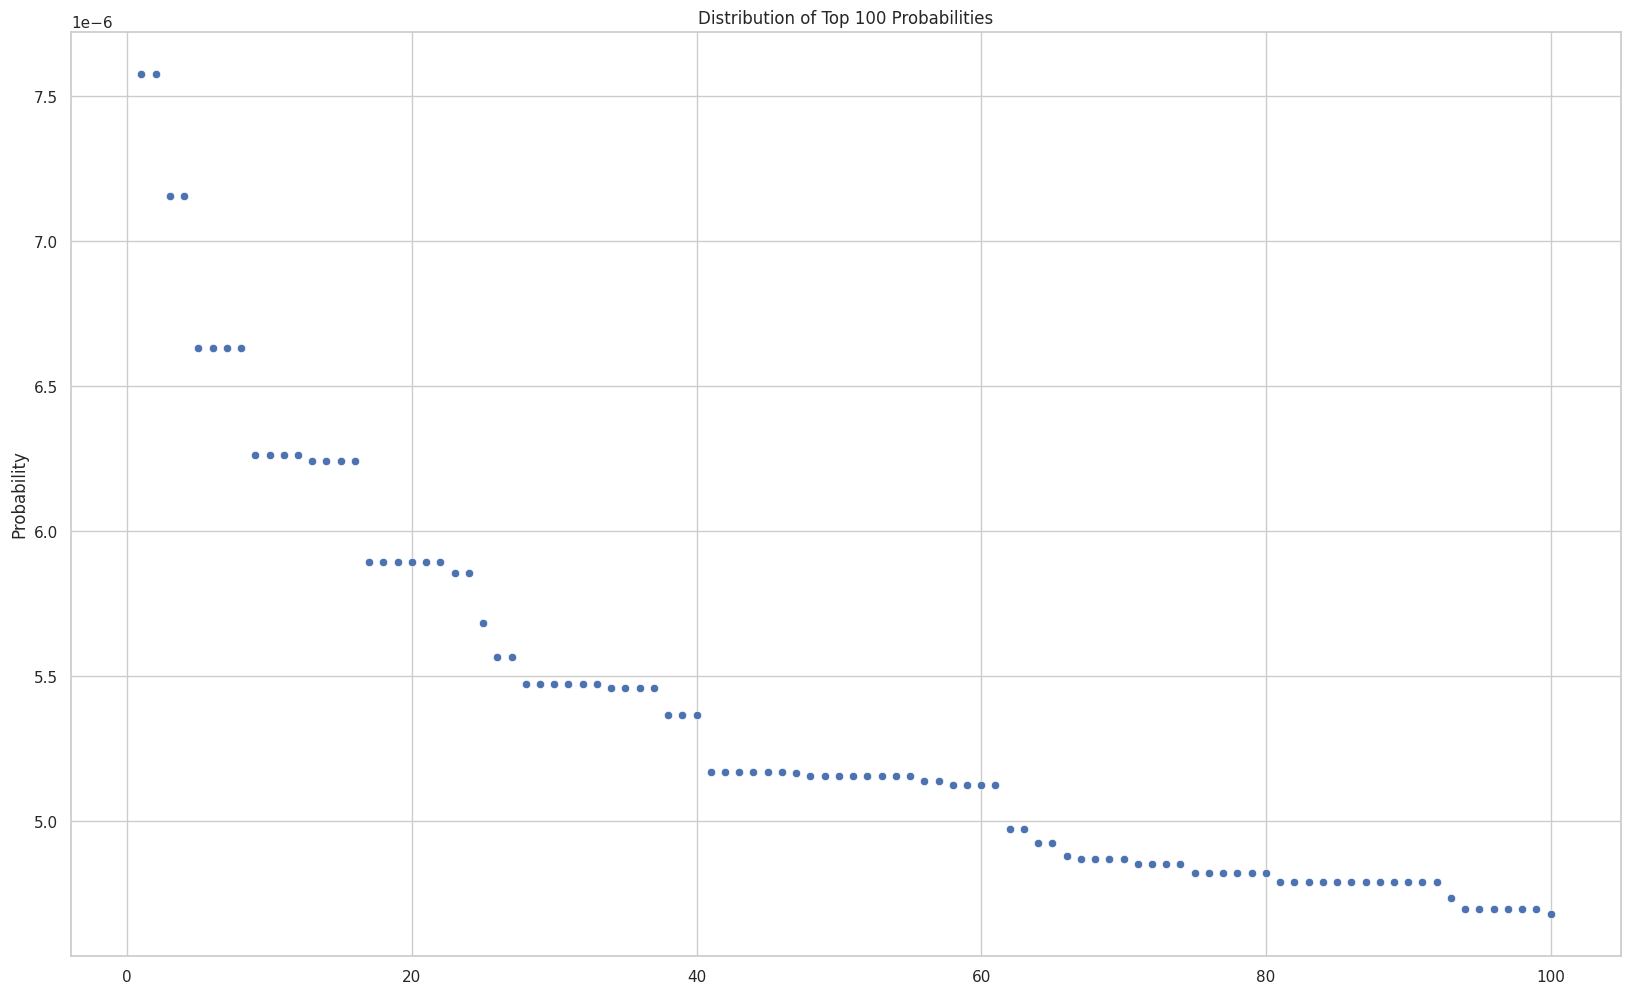

In [53]:
plt.figure(figsize=(20, 12)) 

sns.set(style="whitegrid")
# Extract probabilities from top_results
probabilities = [result for result, _ in top_results]

# Plot the probabilities using seaborn
sns.scatterplot(x=range(1, n+1), y=probabilities)
plt.title(f"Distribution of Top {n} Probabilities")
plt.ylabel("Probability")

plt.show()


Lets relate the results back to the actual bets

Note: For duplicate odds on the same match, both bets are shown

In [56]:
def bet_to_make(individual_result, df = df):    
    result, params = individual_result
    bet_df = pd.DataFrame(columns=['Game', 'Team', 'Score','Odds', 'Probability'])
    for idx, param_to_check in enumerate(params):
        matching_rows = df.loc[(df['Game'] == list(param_grid.keys())[idx]) & (df['Probability'] == param_to_check)]
        
        bet_df = pd.concat([bet_df, matching_rows],ignore_index=True)

    return bet_df, result

placement = 10 # 1 is best result, 2 is second best result, etc.
bet_df, result = bet_to_make(individual_result=top_results[placement-1])
print(f'Probability of Win {result}')
bet_df

Probability of Win 6.261544723083184e-06


/tmp/ipykernel_56941/2053999570.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bet_df = pd.concat([bet_df, matching_rows],ignore_index=True)


,Game,Team,Score,Odds,Probability
0,Fulham vs Bournemouth,Draw,1-1,13/2,0.153846
1,Wolverhampton vs Brentford,Draw,1-1,13/2,0.153846
2,Tottenham vs Brighton,Tottenham,2-1,9/1,0.111111
3,Nottm Forest vs Newcastle,Draw,1-1,7/1,0.142857
4,Luton vs Sheff Utd,Luton,1-0,8/1,0.125000
5,Luton vs Sheff Utd,Luton,2-1,8/1,0.125000
6,Liverpool vs Burnley,Liverpool,3-0,15/2,0.133333
7,Liverpool vs Burnley,Liverpool,2-0,15/2,0.133333


In [55]:
print(f'Probability of Win: {result}')

Probability of Win: 5.156566242539093e-06


Overall, the odds do not appear to be great to predict all 6 results correctly but it may be better for the 3 predictions etc

3 Correct - £5,000

4 Correct - £10,000

5 Correct - £20,000

6 Correct - £250,000